In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\kam00\Documents\Supply chain\data\FMCG_data.csv')
# X = df.iloc[:, :-1]
#  y = df.iloc[:, -1]

In [2]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


# Looking at the basic schema of the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

# Showing some features with missing values

In [4]:
df.loc[:,['wh_est_year','approved_wh_govt_certificate']].head(20)

,wh_est_year,approved_wh_govt_certificate
0,NaN,A
1,NaN,A
2,NaN,A
3,NaN,A+
4,2009.0,C
5,2009.0,A+
6,2010.0,B
7,NaN,C
8,2013.0,A+
9,NaN,C


# How different features are correlated with each other 

In [5]:
df.corr()

C:\Users\kam00\AppData\Local\Temp\ipykernel_23808\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.018549,0.002985,-0.001186,0.003995,-0.010548,-0.001123,-0.007959,0.000048,-0.013764,0.015363,-0.006602,0.260928,0.000608,-0.003302,0.001415
transport_issue_l1y,0.018549,1.000000,-0.005826,-0.001826,0.008993,-0.009596,0.000022,-0.009299,0.014336,-0.009004,-0.012910,-0.144327,0.018207,0.012990,0.002190,-0.173992
Competitor_in_mkt,0.002985,-0.005826,1.000000,-0.156943,-0.001492,0.009338,-0.003444,0.001759,0.008407,0.000050,-0.011202,0.009543,0.009524,0.012733,-0.043455,0.008884
retail_shop_num,-0.001186,-0.001826,-0.156943,1.000000,-0.000395,-0.003774,0.007223,-0.009207,0.000429,-0.005406,0.005721,-0.006632,-0.001273,-0.008420,0.045749,-0.006615
distributor_num,0.003995,0.008993,-0.001492,-0.000395,1.000000,0.004611,-0.003409,0.000454,-0.011838,-0.014682,-0.012295,0.003396,0.002827,0.004286,-0.007934,0.004999
flood_impacted,-0.010548,-0.009596,0.009338,-0.003774,0.004611,1.000000,0.107015,0.164815,0.000749,0.168425,-0.000668,-0.003157,-0.008554,-0.001744,0.000587,-0.002299
flood_proof,-0.001123,0.000022,-0.003444,0.007223,-0.003409,0.107015,1.000000,0.114811,-0.005315,0.041228,-0.003329,-0.002712,0.005636,-0.005151,-0.003600,-0.000441
electric_supply,-0.007959,-0.009299,0.001759,-0.009207,0.000454,0.164815,0.114811,1.000000,-0.002701,0.339990,-0.006577,-0.001877,-0.007600,-0.010371,-0.005234,-0.002160
dist_from_hub,0.000048,0.014336,0.008407,0.000429,-0.011838,0.000749,-0.005315,-0.002701,1.000000,-0.018565,0.009226,-0.005726,0.000902,-0.000906,-0.000531,-0.005017
workers_num,-0.013764,-0.009004,0.000050,-0.005406,-0.014682,0.168425,0.041228,0.339990,-0.018565,1.000000,0.004383,-0.008673,0.001419,-0.017877,-0.003137,-0.008346


# Dropping the rows having null values in wh_est_year

In [6]:
df.dropna(subset=['wh_est_year'],inplace=True)

# Checking for left out features with missing values 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13119 entries, 4 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 13119 non-null  object 
 1   WH_Manager_ID                 13119 non-null  object 
 2   Location_type                 13119 non-null  object 
 3   WH_capacity_size              13119 non-null  object 
 4   zone                          13119 non-null  object 
 5   WH_regional_zone              13119 non-null  object 
 6   num_refill_req_l3m            13119 non-null  int64  
 7   transport_issue_l1y           13119 non-null  int64  
 8   Competitor_in_mkt             13119 non-null  int64  
 9   retail_shop_num               13119 non-null  int64  
 10  wh_owner_type                 13119 non-null  object 
 11  distributor_num               13119 non-null  int64  
 12  flood_impacted                13119 non-null  int64  
 13  f

# Analysing the null values 

In [8]:
df.loc[:,['workers_num','approved_wh_govt_certificate']].head(60)

,workers_num,approved_wh_govt_certificate
4,25.0,C
5,35.0,A+
6,27.0,B
8,22.0,A+
10,37.0,B+
11,16.0,B
12,28.0,B+
13,36.0,A
18,22.0,A+
20,41.0,B+


# Dropping the rows with this feature having null values 

In [9]:
df.dropna(subset=['approved_wh_govt_certificate'],inplace=True)

# Looking for more such features 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12646 entries, 4 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 12646 non-null  object 
 1   WH_Manager_ID                 12646 non-null  object 
 2   Location_type                 12646 non-null  object 
 3   WH_capacity_size              12646 non-null  object 
 4   zone                          12646 non-null  object 
 5   WH_regional_zone              12646 non-null  object 
 6   num_refill_req_l3m            12646 non-null  int64  
 7   transport_issue_l1y           12646 non-null  int64  
 8   Competitor_in_mkt             12646 non-null  int64  
 9   retail_shop_num               12646 non-null  int64  
 10  wh_owner_type                 12646 non-null  object 
 11  distributor_num               12646 non-null  int64  
 12  flood_impacted                12646 non-null  int64  
 13  f

# Locating null values for this feature.

In [11]:
df.loc[:,['workers_num']].iloc[60:,:].head(60)

,workers_num
121,27.0
122,29.0
126,27.0
127,25.0
129,32.0
130,26.0
131,40.0
133,31.0
135,31.0
137,32.0


# Filling missing values with mean using sklearn 

In [12]:
from sklearn.impute import SimpleImputer
import pickle
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df.loc[:,['workers_num']])
df.loc[:,['workers_num']]=imputer.transform(df.loc[:,['workers_num']])
with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)

print("Imputer saved successfully as 'imputer.pkl'")

Imputer saved successfully as 'imputer.pkl'


# Showing the results 

In [13]:
df.loc[:,['workers_num']].iloc[60:,:].head(60)

,workers_num
121,27.000000
122,29.000000
126,27.000000
127,25.000000
129,32.000000
130,26.000000
131,40.000000
133,31.000000
135,31.000000
137,32.000000


# Ensuring the data is clean 

In [14]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [15]:
df.shape

(12646, 24)

# Dropping the unnecessary features 

In [16]:
df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [17]:
l=['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','flood_impacted','flood_proof','electric_supply','dist_from_hub','workers_num','wh_est_year','storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','govt_check_l3m']

In [18]:
X=df.loc[:,l]
y=df.iloc[:,-1]

# Performing train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Displaying basic MAPE of model trained on non-categorical features.  

In [20]:
#Training the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train0,y_train0)
# Predicting on test data 
y_pred=model.predict(X_test0)
from sklearn.metrics import mean_absolute_percentage_error
# Baseline mape for linear regression
basic_mape=mean_absolute_percentage_error(y_pred,y_test0)
print(basic_mape)

0.05283998950440429


# One hot Encoding the categorical fetaures of the entire dataframe 

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
transformed_df=df
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 3,8,18])], remainder='passthrough')
transformed = ct.fit_transform(df)
transformed_columns = ct.get_feature_names_out()
transformed_df = pd.DataFrame(transformed, columns=transformed_columns, index=df.index)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(ct, f)

print("Transformer saved successfully as 'transformer.pkl'")

Transformer saved successfully as 'transformer.pkl'


# Visualizing the correlation of the transformed dataframe. 

<AxesSubplot: >

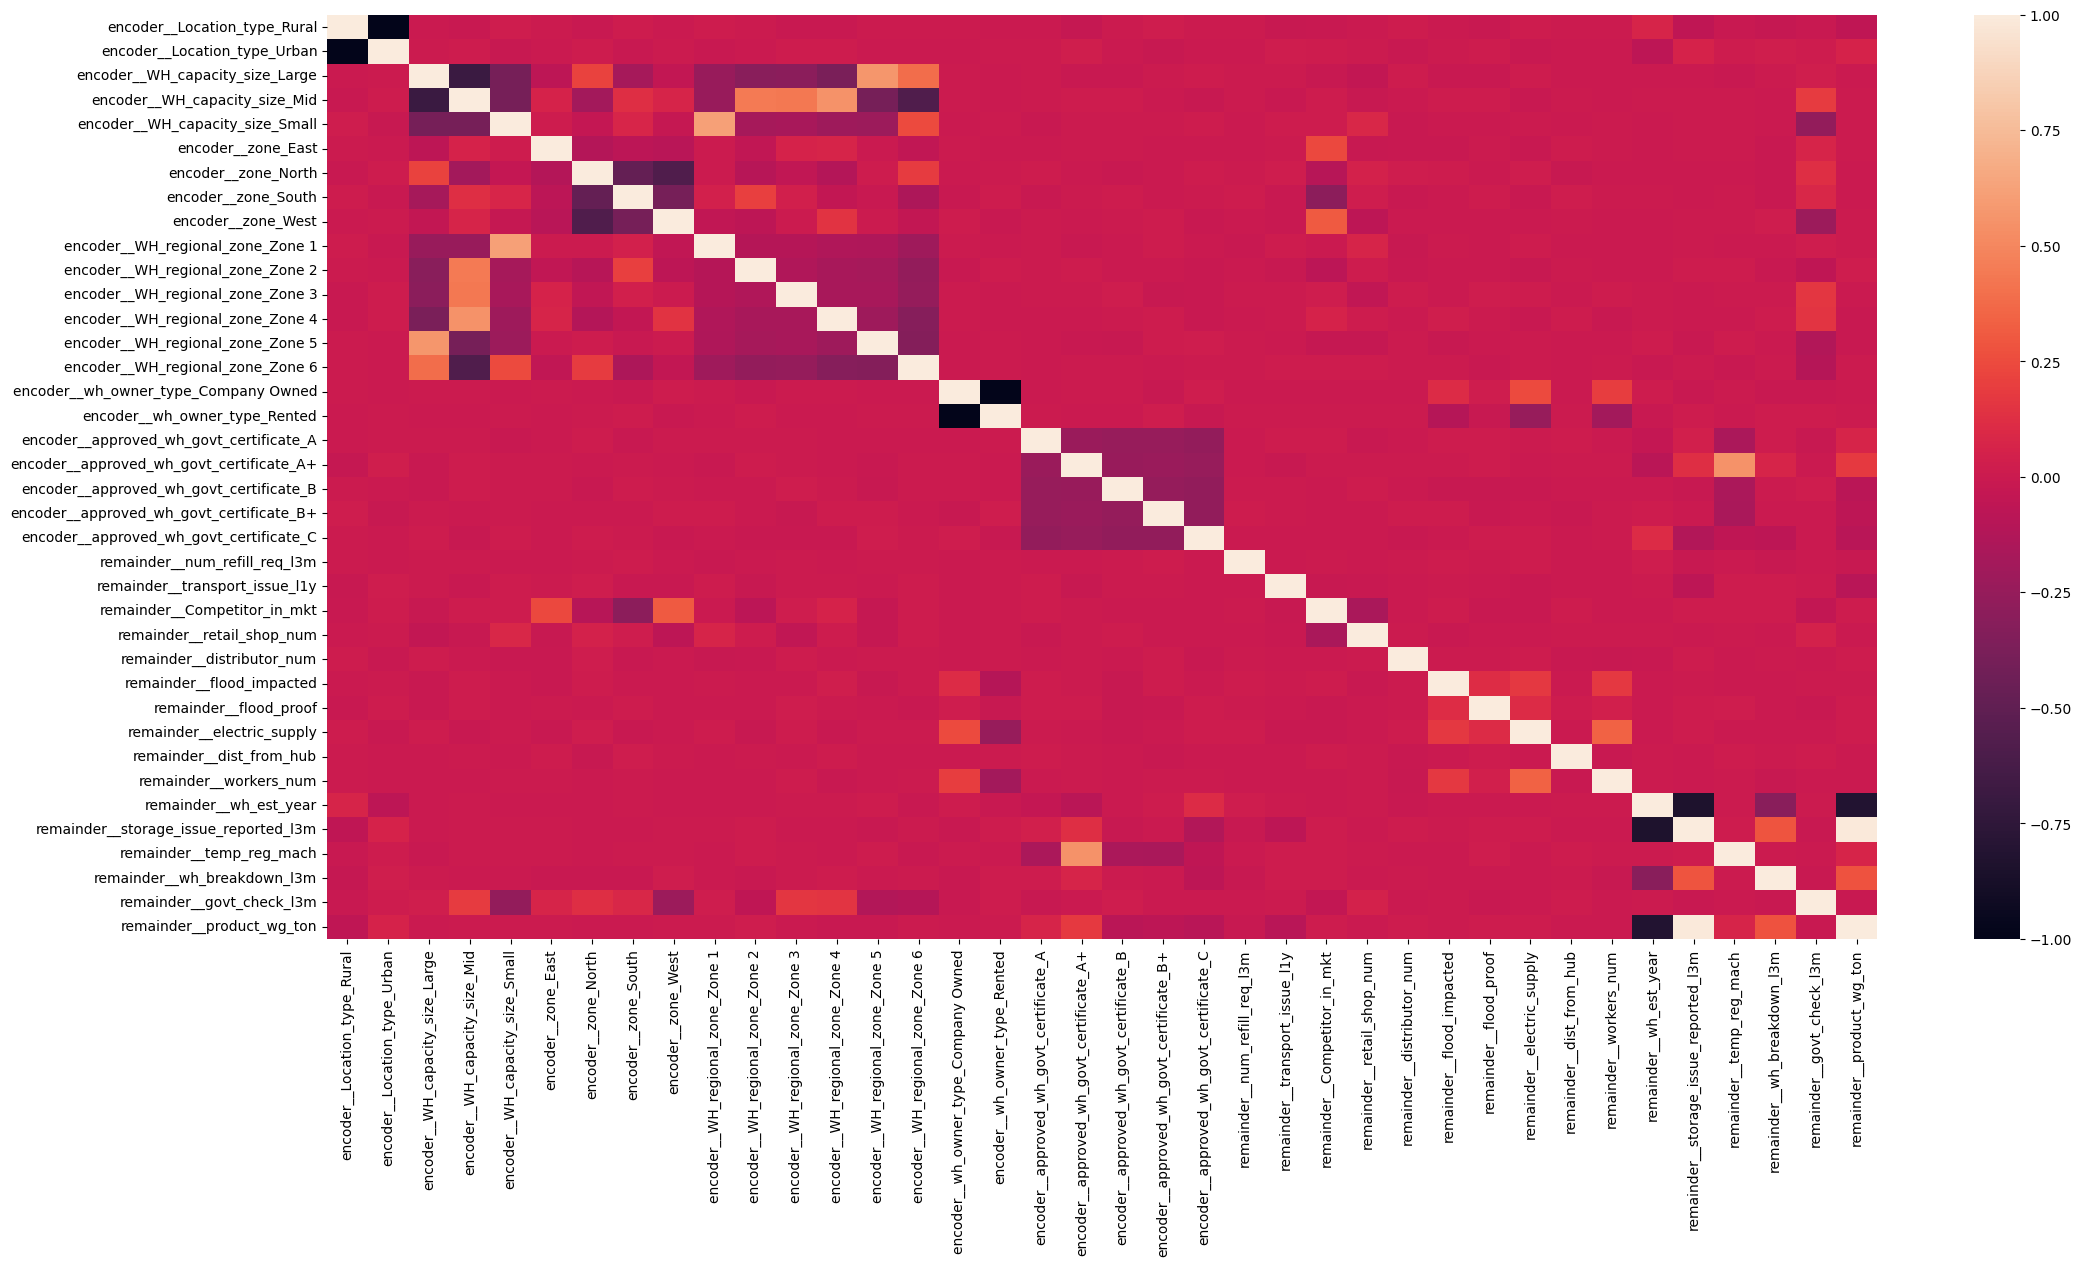

In [22]:
transformed_df
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12))
sns.heatmap(data=transformed_df.corr())

In [23]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12646 entries, 4 to 24999
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   encoder__Location_type_Rural              12646 non-null  float64
 1   encoder__Location_type_Urban              12646 non-null  float64
 2   encoder__WH_capacity_size_Large           12646 non-null  float64
 3   encoder__WH_capacity_size_Mid             12646 non-null  float64
 4   encoder__WH_capacity_size_Small           12646 non-null  float64
 5   encoder__zone_East                        12646 non-null  float64
 6   encoder__zone_North                       12646 non-null  float64
 7   encoder__zone_South                       12646 non-null  float64
 8   encoder__zone_West                        12646 non-null  float64
 9   encoder__WH_regional_zone_Zone 1          12646 non-null  float64
 10  encoder__WH_regional_zone_Zone 2  

# Creating dependent and independent variables

In [24]:
X_transformed_df= transformed_df.iloc[:,:-1]
y = df.iloc[:, -1]

# Performing train test splt

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size = 0.2, random_state = 1)

# Looking for the change after split

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12646 entries, 4 to 24999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_refill_req_l3m          12646 non-null  int64  
 1   transport_issue_l1y         12646 non-null  int64  
 2   Competitor_in_mkt           12646 non-null  int64  
 3   retail_shop_num             12646 non-null  int64  
 4   distributor_num             12646 non-null  int64  
 5   flood_impacted              12646 non-null  int64  
 6   flood_proof                 12646 non-null  int64  
 7   electric_supply             12646 non-null  int64  
 8   dist_from_hub               12646 non-null  int64  
 9   workers_num                 12646 non-null  float64
 10  wh_est_year                 12646 non-null  float64
 11  storage_issue_reported_l3m  12646 non-null  int64  
 12  temp_reg_mach               12646 non-null  int64  
 13  wh_breakdown_l3m            126

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10116 entries, 10284 to 500
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   encoder__Location_type_Rural              10116 non-null  float64
 1   encoder__Location_type_Urban              10116 non-null  float64
 2   encoder__WH_capacity_size_Large           10116 non-null  float64
 3   encoder__WH_capacity_size_Mid             10116 non-null  float64
 4   encoder__WH_capacity_size_Small           10116 non-null  float64
 5   encoder__zone_East                        10116 non-null  float64
 6   encoder__zone_North                       10116 non-null  float64
 7   encoder__zone_South                       10116 non-null  float64
 8   encoder__zone_West                        10116 non-null  float64
 9   encoder__WH_regional_zone_Zone 1          10116 non-null  float64
 10  encoder__WH_regional_zone_Zone 2

**Printing basic mape for comparison**

In [28]:
print(basic_mape)

0.05283998950440429


# Obtaining new MAPE

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
# Predicting on test data 
y_pred=model.predict(X_test)
from sklearn.metrics import mean_absolute_percentage_error
# Baseline mape for linear regression
mean_absolute_percentage_error(y_pred,y_test)

0.046968990696934144

**Clearly there is 11.1% reduction in MAPE after one hot encoding.** 

# converting numpy array y_pred to series for results visualisation.

In [30]:
s1=pd.Series(data=y_pred,index=y_test.index)

# Plotting predictions and ground truth values

<AxesSubplot: ylabel='product_wg_ton'>

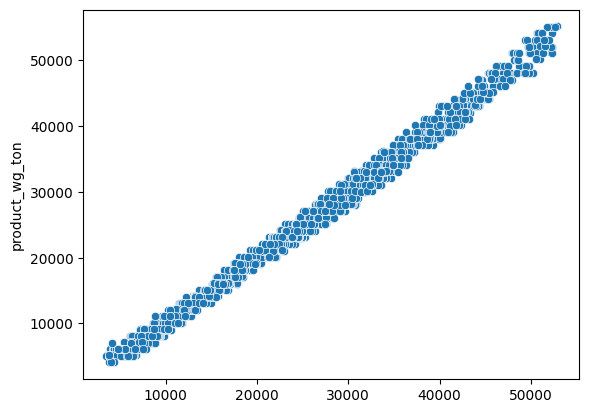

In [31]:
sns.scatterplot(x=s1,y=y_test)

# Plotting noise and ground truth values

<AxesSubplot: ylabel='product_wg_ton'>

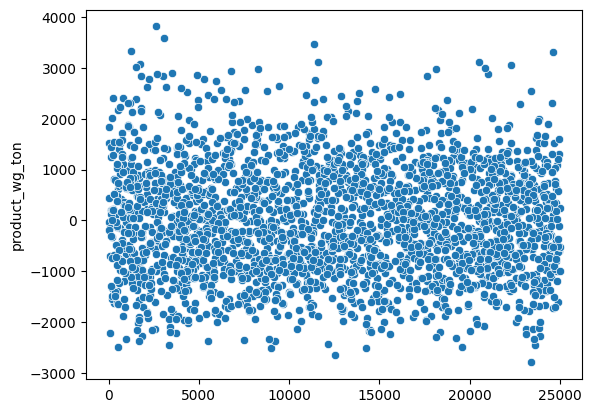

In [32]:
s2=y_test-y_pred
sns.scatterplot(data=s2)

<AxesSubplot: xlabel='product_wg_ton', ylabel='Count'>

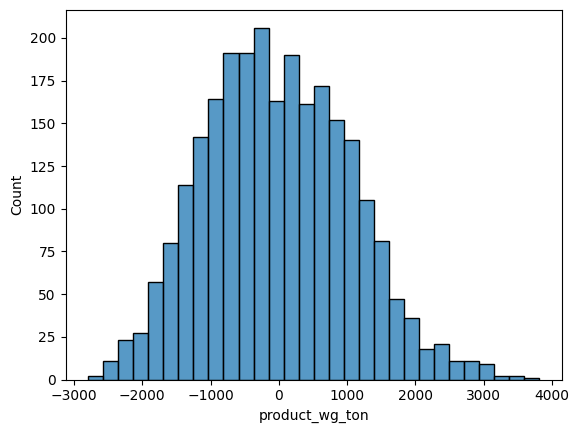

In [33]:
sns.histplot(data=s2)

# Noise has some correlation with ground truth values

In [34]:
s2.corr(y_test)

0.08774096490639152

# Looking for features correlating with noise.

In [35]:
X_test.corrwith(s2)

encoder__Location_type_Rural                0.034668
encoder__Location_type_Urban               -0.034668
encoder__WH_capacity_size_Large             0.012314
encoder__WH_capacity_size_Mid              -0.001444
encoder__WH_capacity_size_Small            -0.014099
encoder__zone_East                         -0.006498
encoder__zone_North                         0.002976
encoder__zone_South                        -0.017652
encoder__zone_West                          0.015187
encoder__WH_regional_zone_Zone 1           -0.002592
encoder__WH_regional_zone_Zone 2            0.011661
encoder__WH_regional_zone_Zone 3            0.019553
encoder__WH_regional_zone_Zone 4           -0.027832
encoder__WH_regional_zone_Zone 5           -0.009461
encoder__WH_regional_zone_Zone 6            0.010804
encoder__wh_owner_type_Company Owned        0.021846
encoder__wh_owner_type_Rented              -0.021846
encoder__approved_wh_govt_certificate_A    -0.046463
encoder__approved_wh_govt_certificate_A+   -0.

# Initial shape of test data 

In [36]:
X_test.shape

(2530, 37)

In [37]:
u=int(X_test.shape[0]/2)
print(u)

1265


**Splitting the test data into valid and test1(new test) each having equal amount of data.**

In [38]:
X_val=X_test.iloc[:u,:]
X_test1=X_test.iloc[u:,:]
y_val=y_test[:u]
y_test1=y_test[u:]

C:\Users\kam00\AppData\Local\Temp\ipykernel_23808\717848569.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_val=y_test[:u]
C:\Users\kam00\AppData\Local\Temp\ipykernel_23808\717848569.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test1=y_test[u:]


**Training RandomForestRegressor model on X_valid and predictions (generated by linear regression) corresponding to X_val.**  

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_val, y_pred[:u])
# Predicting on new test data 
y_pred1=regressor.predict(X_test1)
mean_absolute_percentage_error(y_pred1,y_test1)

0.04945705594814558

**Training RandomForestRegressor model on X_valid and noise (generated by linear regression) corresponding to X_val.**

In [40]:
from sklearn.ensemble import RandomForestRegressor
import pickle
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(X_val, y_val-y_pred[:u])
# Predicting on new test data 
y_pred1=regressor1.predict(X_test1)
mean_absolute_percentage_error(y_pred1+y_pred[u:],y_test1)



0.03741935654077751

In [41]:
with open('random_forest_regressor.pkl', 'wb') as f:
    pickle.dump(regressor1, f)

print("Model saved to random_forest_regressor.pkl")

Model saved to random_forest_regressor.pkl


**Clearly 24.22% decrease in MAPE is visible after using noise instead of predictions.**

# **Thank You**